<a href="https://colab.research.google.com/github/sudhakarmlal/END_NLP_GPT3/blob/main/Session1/Sentiment_Analysis_using_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis using Naive Bayes

In this assignment, we will attempt to label tweets with sentiments (positive, neutral and negative) using Naive Bayes classifier. Naive Bayes is a very basic approach to this problem, but gives surprisingly good accuracy sometimes.

**Fill in the Blanks**

## Importing required libraries

In [ ]:
import pandas as pd
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

## Reading dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_path='/content/drive/My Drive/END/S1/'
data_file=project_path+'tweets.csv'

In [ ]:
data=pd.read_csv(data_file,encoding='UTF8')
data.drop(data.columns[0],axis=1,inplace=True)
data.sample(10)

,tweets,labels
1088,How Saul Alinsky Taught #Obama to Say One Thi...,0
360,"Happy Passover, love Obama http://t.co/gHQ3NrWP",2
491,RT @MacehuaHart: Sharing: http://t.co/ztufxsn1...,0
701,"Speaking of the constitution, if you vote for ...",0
900,Obama Next.....LMAO http://t.co/eEqWimgY,0
1012,Dumb Obama my 4year old brother could do a bet...,1
228,Top News Headlines: Obama Signs JOBS Act http:...,1
759,http://t.co/pS9fQaaL idk. does Obama give Musl...,0
797,"@MittRomney Yes, we all have weaknesses, but i...",0
704,RT @Lever_OFA_NH: Obama's Organizational Advan...,1


In [ ]:
data.isnull().sum()


tweets    5
labels    0
dtype: int64

In [ ]:
## Dropping 5 null tweets
data.dropna(inplace=True)
data.reset_index(inplace=True)

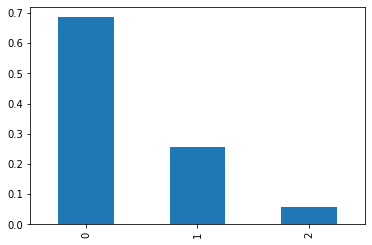

In [ ]:
## lets see the naure of the target.
data.labels.value_counts(normalize=True).plot(kind='bar')

## Text processing for the tweets

In [ ]:
import nltk 
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 

stopwords = set(stopwords.words('english') + list(punctuation) + ['AT_USER','URL'])
    
def processTweet(tweet):
    # tweet is the text we will pass for preprocessing 
    # convert passed tweet to lower case 
    tweet=  tweet.lower()
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet) # remove URLs
    tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet) # remove the # in #hashtag
    
    # use work_tokenize imported above to tokenize the tweet
    tweet=word_tokenize(tweet)
    return [word for word in tweet if len(word)>2 if word not in stopwords]

## Process all tweets

In [ ]:
processed=[]

for tweet in data['tweets']:
    # process all tweets using processTweet function above - store in variable 'cleaned' 
    cleaned=processTweet(tweet)
    processed.append(' '.join(cleaned))

In [ ]:
data['processed'] = processed

In [ ]:
data.sample(10)

,index,tweets,labels,processed
1205,1208,@MichelleObama great photo of Mrs Obama .,1,great photo mrs obama
547,548,RT @Atrios: probably not the most important th...,1,probably important thing world hope security t...
648,650,You know things are going bad for the #GOP whe...,0,know things going bad gop resort calling obama...
263,263,#edshow Whenever Obama tells the truth about t...,0,edshow whenever obama tells truth gop boo hoo ...
840,842,"RT @blakehounshell: From Ignatius: ""U.S. offic...",2,ignatius u.s. officials hope putin broker syri...
1245,1248,RT @TCOTvideos: Obama's snafu over Supreme Cou...,1,obama snafu supreme court job duties give hint...
212,212,Obama 2 versions of his ties 2 #ACORN : At 200...,0,obama versions ties acorn 2008 debate acorn wh...
1369,1374,RT @edshow: Women at Augusta? Obama says absol...,0,women augusta obama says absolutely romney hed...
336,336,"RT @ohgirlphrase: American kid ""You're from th...",0,american kid 're ohhh cool tea queen british k...
683,685,The actual Barack Obama Campaign And its parti...,0,actual barack obama campaign particular impact...


In [ ]:
## from the above output it is noticed that not all the puntuations are removed hence there is a need to refine the function.

## Create pipeline and define parameters for GridSearch

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])

tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}

## Split data into test and train

In [ ]:
# split data into train and test with split as 0.2 
X = data['processed']
Y = data['labels']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size =.2,random_state=7,stratify=data['labels'])

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('Y_train',Y_train.shape)
print('Y_test',Y_test.shape)

X_train (1100,)
X_test (275,)
Y_train (1100,)
Y_test (275,)


## Perform classification (using GridSearch)

In [ ]:
# perform GridSearch CV with 10 fold CV using pipeline and tuned_paramters defined above 
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(text_clf,tuned_parameters,cv=10)
clf.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        pre

In [ ]:
clf.best_params_

{'clf__alpha': 0.1,
 'tfidf__norm': 'l2',
 'tfidf__use_idf': False,
 'vect__ngram_range': (1, 2)}

In [ ]:
Y_pred=clf.predict(X_test)

## Classification report 

In [ ]:
# print classification report after predicting on test set with best model obtained in GridSearch
from sklearn.metrics import classification_report,confusion_matrix
Y_pred=clf.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       188
           1       0.88      0.72      0.79        71
           2       1.00      0.38      0.55        16

    accuracy                           0.87       275
   macro avg       0.92      0.69      0.75       275
weighted avg       0.88      0.87      0.86       275



In [ ]:
print(confusion_matrix(Y_test,Y_pred)) ## the recall is not good for class 1 and 2.

[[183   5   0]
 [ 20  51   0]
 [  8   2   6]]


## Important:

In [ ]:
counts = data.labels.value_counts()
print(counts)

0    942
1    352
2     81
Name: labels, dtype: int64


We can see above that the class distribution is highly imbalanced, this would not lead to good sampling of the data for the classifier. For your learning, try using [SMOTE](https://imbalanced-learn.readthedocs.io/en/stable/api.html) to oversample the minority classes and then evaluate the performance with Naive Bayes and compare.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sampler = SMOTE(random_state=0)

text_clf_sm = Pipeline([                        
                      ('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('smot',SMOTE()),
                     ('clf', MultinomialNB())
                     ])

#p1=Pipeline(sampler,text_clf_sm)

tuned_parameters_sm = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'smot__k_neighbors' : [5,10,15,20],
    #'sampling_strategy':(str),
    'clf__alpha': [1, 1e-1, 1e-2]
}

In [ ]:
clf_sm = GridSearchCV(text_clf_sm,tuned_parameters_sm,cv=10)
clf_sm.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        pre

In [ ]:
clf_sm.best_params_

{'clf__alpha': 1,
 'smot__k_neighbors': 20,
 'tfidf__norm': 'l2',
 'tfidf__use_idf': True,
 'vect__ngram_range': (2, 2)}

In [ ]:
## We can see now that the recall value has increased for class 1 and 2.
Y_pred=clf_sm.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       188
           1       0.84      0.69      0.76        71
           2       0.67      0.38      0.48        16

    accuracy                           0.85       275
   macro avg       0.79      0.67      0.71       275
weighted avg       0.85      0.85      0.84       275

